In [1]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from yahoo_fin import stock_info as si
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta

import tools
import importlib
importlib.reload(tools)

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

### Download data from AWS S3

In [2]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.download_data_from_s3(s3_bucket, local_path)

In [3]:
num_of_years = 10
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years) + 10)
end = dt.date.today()

In [4]:
# df = pd.read_csv('data/mktcap.csv', index_col=0)
# df = df[df['mktcap']>0]
#
# Use csv file from China
# df = pd.read_csv('../data/hk_stock_full.csv', header=None)
df = pd.read_csv('../data/clean_hk_stock.csv', header=None)
df = df.rename(columns={0: 'stock'})

In [5]:
df

,stock
0,^HSI
1,0001.HK
2,0002.HK
3,0003.HK
4,0004.HK
5,0005.HK
6,0006.HK
7,0007.HK
8,0008.HK
9,0010.HK


In [6]:
def stock_begin_timegap(stock):
    num_of_years = 10
    start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
    try:
        df = yf.download(stock, start=start)
        stock_start = df.index[0]
        coeff_var = df['Close'].std() / df['Close'].mean()
        return np.array(((stock_start - pd.to_datetime(start)).days, coeff_var))
    except:
        return np.array((10000, 10000))

In [7]:
%%time
df['gap'], df['coeff_var'] = zip(*df['stock'].apply(stock_begin_timegap))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 0198.HK: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
df

,stock,gap,coeff_var
0,^HSI,3.0,0.130195
1,0001.HK,3.0,0.183795
2,0002.HK,3.0,0.123746
3,0003.HK,3.0,0.199115
4,0004.HK,3.0,0.216155
5,0005.HK,3.0,0.199008
6,0006.HK,3.0,0.153817
7,0007.HK,3.0,0.436447
8,0008.HK,3.0,0.176478
9,0010.HK,3.0,0.328545


In [9]:
stock_df = df[(df['gap']<=5) & (df['coeff_var']<1000)]

In [10]:
stock_df.count()

stock        712
gap          712
coeff_var    712
dtype: int64

In [11]:
stock_df.describe()

,gap,coeff_var
count,712.000000,712.000000
mean,3.004213,0.444286
std,0.432484,0.270038
min,-1.000000,0.114053
25%,3.000000,0.267512
50%,3.000000,0.382663
75%,3.000000,0.545104
max,5.000000,3.140617


In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 1246
Data columns (total 3 columns):
stock        712 non-null object
gap          712 non-null float64
coeff_var    712 non-null float64
dtypes: float64(2), object(1)
memory usage: 22.2+ KB


In [13]:
### stock_df = stock_df[stock_df['coeff_var']<=stock_df['coeff_var'].mean()]

In [14]:
stock_df.to_csv('../data/10yr_stock_qualified.csv')

### Get all dataset

In [15]:
stock_df = pd.read_csv('../data/10yr_stock_qualified.csv', index_col=0)

In [16]:
print('{} {}'.format(start, end))

2010-12-21 2020-12-30


In [18]:
%%time
tickers = stock_df['stock'].to_list()
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  712 of 712 completed
CPU times: user 1min 7s, sys: 8.9 s, total: 1min 16s
Wall time: 1min 11s


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2574 entries, 2010-12-20 to 2020-12-29
Columns: 712 entries, 0001.HK to ^HSI
dtypes: float64(712)
memory usage: 14.0 MB


In [20]:
dataset.to_csv('../data/10yr_stock_close.csv')

In [21]:
dataset.head(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0010.HK,0011.HK,...,3918.HK,3933.HK,3968.HK,3988.HK,3989.HK,3993.HK,3998.HK,3999.HK,6823.HK,^HSI
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-21,55.382057,42.630985,5.939397,7.806098,49.875046,27.308163,0.74,1.792994,40.630898,84.501320,...,0.962784,14.100760,13.574664,2.321680,0.40643,1.056937,2.051681,1.371677,0.240731,22993.859375
2010-12-22,57.334511,42.298962,5.907772,7.840768,49.906128,27.225569,0.76,1.821545,40.827366,84.888939,...,0.956651,13.910029,13.629915,2.304775,0.42579,1.060098,2.198230,1.344243,0.245157,23045.189453


### Use close on all stocks to compile result

In [22]:
dataset = pd.read_csv('../data/10yr_stock_close.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)

In [23]:
dataset.tail(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0010.HK,0011.HK,...,3918.HK,3933.HK,3968.HK,3988.HK,3989.HK,3993.HK,3998.HK,3999.HK,6823.HK,^HSI
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,53.650002,71.099998,11.36,20.450001,40.099998,40.750000,0.097,4.69,19.000000,132.399994,...,9.63,5.40,47.650002,2.59,0.118,4.18,3.52,0.82,10.12,26386.560547
2020-12-28,54.500000,71.449997,11.42,20.450001,40.000000,41.250000,0.094,4.65,18.879999,133.300003,...,9.49,5.18,48.500000,2.63,0.118,4.86,3.73,0.82,10.16,26314.630859
2020-12-29,54.400002,71.699997,11.44,20.600000,40.250000,41.400002,0.101,4.66,19.000000,133.399994,...,9.61,5.65,48.349998,2.64,0.118,4.80,3.71,0.85,10.10,26568.490234


### Remove Null in Dataset

In [24]:
null_count = list()
for i in dataset.index:
    null_dict = {
        'index' : i,
        'count' : dataset.loc[i].isna().sum()
    }
    null_count.append(null_dict)

In [25]:
null_df = pd.DataFrame(null_count)
null_df['index'] = pd.to_datetime(null_df['index'])
null_df.set_index('index', inplace=True)
null_df.head(20)

,count
index,
2010-12-20,706
2010-12-21,11
2010-12-22,9
2010-12-23,10
2010-12-27,710
2010-12-28,12
2010-12-29,16
2010-12-30,31
2010-12-31,706


In [26]:
null_df.describe()

,count
count,2574.000000
mean,33.473582
std,141.359066
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,712.000000


In [27]:
null_df['count'].quantile(0.8)

0.0

In [28]:
null_df['count'].quantile(0.9)

33.0

In [29]:
null_df['count'].quantile(0.95)

68.0

In [30]:
null_df[null_df['count']<=700].max()

count    82
dtype: int64

In [31]:
null_df[(null_df['count']>83) & (null_df['count']<700)]

,count
index,


In [32]:
non_trading_index = null_df[null_df['count']>700].index

In [33]:
non_trading_index

DatetimeIndex(['2010-12-20', '2010-12-27', '2010-12-31', '2011-02-02',
               '2011-09-29', '2011-12-27', '2012-01-23', '2012-01-24',
               '2012-01-25', '2012-03-19',
               ...
               '2019-12-26', '2020-01-27', '2020-01-28', '2020-04-13',
               '2020-04-30', '2020-05-01', '2020-06-25', '2020-10-01',
               '2020-10-02', '2020-10-13'],
              dtype='datetime64[ns]', name='index', length=108, freq=None)

In [34]:
dataset.drop(non_trading_index, inplace=True)

In [35]:
dataset.fillna(method='ffill', inplace=True)

In [36]:
null_count = list()
for i in dataset.index:
    null_dict = {
        'index' : i,
        'count' : dataset.loc[i].isna().sum()
    }
    null_count.append(null_dict)
null_df = pd.DataFrame(null_count)
null_df['index'] = pd.to_datetime(null_df['index'])
null_df.set_index('index', inplace=True)
null_df.describe()

,count
count,2466.000000
mean,0.020276
std,0.397245
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,11.000000


In [37]:
null_df[null_df['count']>0].count()

count    8
dtype: int64

In [38]:
null_df[null_df['count']>0]

,count
index,
2010-12-21,11
2010-12-22,9
2010-12-23,7
2010-12-28,7
2010-12-29,7
2010-12-30,6
2011-01-03,2
2011-01-04,1


In [39]:
dataset.dropna(axis=0, how='any', inplace=True)

In [40]:
dataset.to_csv('../data/clean_10yr_stock_close.csv')

### analyze shift

In [ ]:
dataset['0001.HK'].head(5)

In [ ]:
dataset['0001.HK'].shift(1).head(5)

In [ ]:
dataset['0001.HK'].shift(2).head(5)

In [ ]:
print('Rise {}  Drop {}  NoChange {}'.format(np.log(0.9), np.log(1.1), np.log(1)))

### prevday and today (Train and Test)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2575 entries, 2010-12-15 to 2020-12-24
Columns: 707 entries, 0001.HK to 6823.HK
dtypes: float64(707)
memory usage: 14.0 MB


In [35]:
train_start = '2011-01-01'
train_end = '2011-12-31'
dataset = dataset[train_start:train_end]

In [36]:
prevday_returns = np.log(dataset.shift(1)/dataset.shift(2))
today_returns = np.log(dataset/dataset.shift(1))

In [37]:
stocks_prev = prevday_returns.columns.to_list()
stocks_today = today_returns.columns.to_list()

In [38]:
new_col = ['{}.prev'.format(c) for c in stocks_prev]
prevday_returns.columns = new_col

In [39]:
comb_df = pd.concat([prevday_returns, today_returns], axis=1)

In [40]:
%%time
print('\nCorrelation Matrix')
corr_matrix = comb_df.corr()
# print(corr_matrix)


Correlation Matrix
CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.02 s


In [41]:
corr_matrix_corrected = corr_matrix.loc[new_col, stocks_today]

### What to drop

In [42]:
sorted_corr = corr_matrix_corrected.abs().unstack().sort_values(ascending=False)
sorted_corr.shape

(499849,)

In [43]:
sorted_corr.head(10)

0252.HK  0252.HK.prev    0.999820
0096.HK  0252.HK.prev    0.865528
0265.HK  0252.HK.prev    0.864138
0252.HK  0158.HK.prev    0.786192
         0413.HK.prev    0.733655
0859.HK  0252.HK.prev    0.733577
0877.HK  0252.HK.prev    0.731352
0529.HK  0252.HK.prev    0.729393
2309.HK  0252.HK.prev    0.719623
0252.HK  0837.HK.prev    0.717876
dtype: float64

### Analyze the top pair

In [46]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2011-01-03 to 2011-12-30
Columns: 1414 entries, 0001.HK.prev to 6823.HK
dtypes: float64(1414)
memory usage: 2.7 MB


In [44]:
for i, r in sorted_corr.head(10).items():
    prev = i[1]
    today = i[0]
    print('{} {} {:.2f}'.format(prev, today, comb_df[prev].corr(comb_df[today])))

0252.HK.prev 0252.HK -1.00
0252.HK.prev 0096.HK 0.87
0252.HK.prev 0265.HK 0.86
0158.HK.prev 0252.HK 0.79
0413.HK.prev 0252.HK 0.73
0252.HK.prev 0859.HK -0.73
0252.HK.prev 0877.HK 0.73
0252.HK.prev 0529.HK -0.73
0252.HK.prev 2309.HK -0.72
0837.HK.prev 0252.HK -0.72


0.8655280021393076
0252.HK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total prev stock rise 3
Total prev stock rise and today rise 1


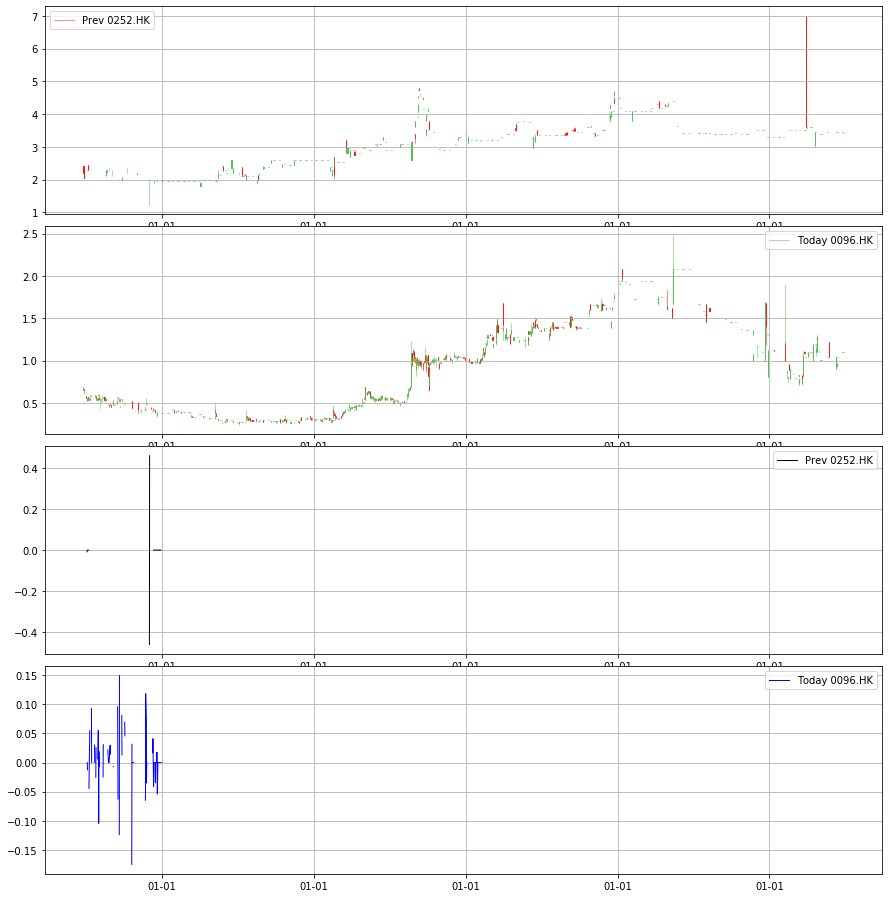

In [45]:
stock1 = '0252.HK.prev'
stock2 = '0096.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
tools.plot_two_stocks(stock1, stock2, prevday_returns, today_returns, start)

### Grapth the top correlation pair

In [ ]:
stock1 = '6898.HK.prev'
stock2 = '8612.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2, prevday_returns[stock1], today_returns[stock2])

### Upload to AWS S3

In [41]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.upload_data_to_s3(s3_bucket, local_path)